In [1]:
import pandas as pd


In [2]:
# Load the dataset
tips_df = pd.read_csv("tips.csv")


In [4]:
#1. Display the first few rows of the DataFrame to verify the data has been loaded correctly
print(tips_df.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [5]:
# 2. Compute the average bill amount for each day
average_bill_per_day = tips_df.groupby("day")["total_bill"].mean()
print("\nAverage bill amount for each day:")
print(average_bill_per_day)



Average bill amount for each day:
day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64


In [6]:
#3. Determine which gender is more generous in giving tips
average_tip_by_gender = tips_df.groupby("sex")["tip"].mean()
print("\nAverage tip amount by gender:")
print(average_tip_by_gender)


Average tip amount by gender:
sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


In [7]:
#4. Check if there were more customers for dinner or lunch
customer_count_by_time = tips_df["time"].value_counts()
print("\nCustomer count by time:")
print(customer_count_by_time)


Customer count by time:
time
Dinner    176
Lunch      68
Name: count, dtype: int64


In [8]:
# 5. Statistical summary of the 'tip' variable
tip_summary = tips_df['tip'].describe()
print("\nStatistical summary of the 'tip' variable:")
print(tip_summary)



Statistical summary of the 'tip' variable:
count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64


In [9]:
#6. find the busiest day in terms of the orders?

busiest_day = tips_df['day'].value_counts().idxmax()
print("Busiest day in terms of orders:", busiest_day)


Busiest day in terms of orders: Sat


C:\Users\madhu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


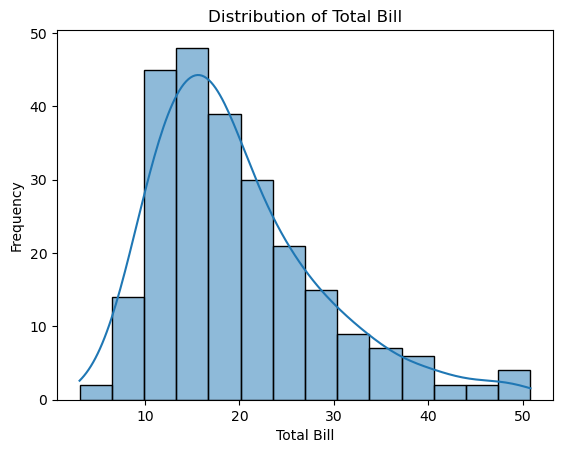

Skewness of 'total_bill': 1.1332130376158205


In [10]:
#7.is the variable "total_bill" skewed? if yes, identify the type 
#of skewness. support your answer with a plot
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of 'total_bill'
sns.histplot(tips_df['total_bill'], kde=True)
plt.title('Distribution of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

# Check skewness
skewness = tips_df['total_bill'].skew()
print("Skewness of 'total_bill':", skewness)


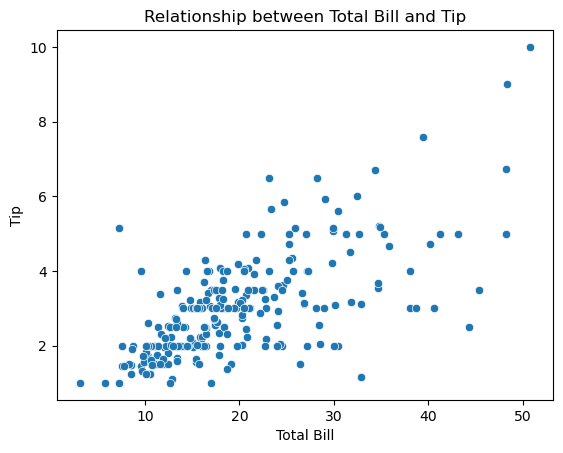

Correlation coefficient between 'total_bill' and 'tip': 0.6757341092113646


In [11]:
#Determine if the tip amount is dependent on the total bill. 
#Visualize the relationship with an
#appropriate plot and metric, and write your findings:
# Plot the relationship between 'total_bill' and 'tip'
sns.scatterplot(x='total_bill', y='tip', data=tips_df)
plt.title('Relationship between Total Bill and Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

# Calculate the correlation coefficient
correlation = tips_df['total_bill'].corr(tips_df['tip'])
print("Correlation coefficient between 'total_bill' and 'tip':", correlation)


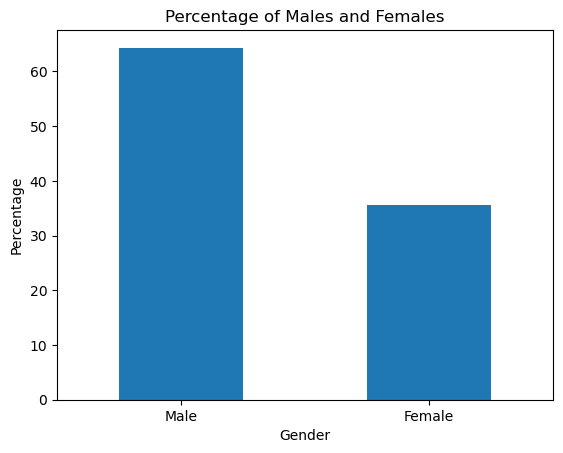

In [15]:
#9. Compute the percentage of males and females in the dataset
#and display it in the plot:
    # Calculate the percentage of males and females
gender_percentage = tips_df['sex'].value_counts(normalize=True) * 100

# Plot the percentage of males and females
gender_percentage.plot(kind='bar', rot=0)
plt.title('Percentage of Males and Females')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()


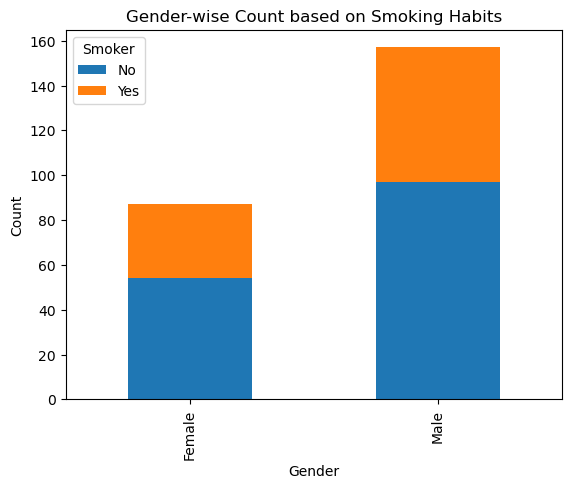

In [16]:
#10 Compute the gender-wise count based on smoking
#habits and display it in the plot:
# Count the number of males and females based on smoking habits
gender_smoker_count = tips_df.groupby(['sex', 'smoker']).size().unstack()

# Plot the gender-wise count based on smoking habits
gender_smoker_count.plot(kind='bar', stacked=True)
plt.title('Gender-wise Count based on Smoking Habits')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Smoker')
plt.show()


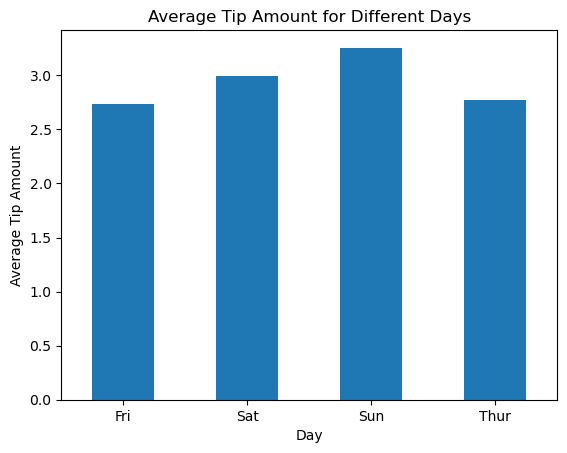

In [17]:
#11. Compute the average tip amount given for
#different days and display it in the plot:
# Compute the average tip amount for each day
average_tip_per_day = tips_df.groupby('day')['tip'].mean()

# Plot the average tip amount for different days
average_tip_per_day.plot(kind='bar', rot=0)
plt.title('Average Tip Amount for Different Days')
plt.xlabel('Day')
plt.ylabel('Average Tip Amount')
plt.show()


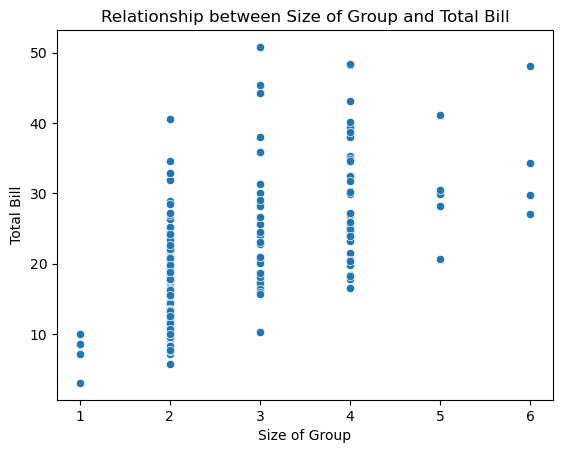

Correlation coefficient between 'size' and 'total_bill': 0.5983151309049013


In [18]:
#12. Determine if the average bill amount is
#dependent on the size of the group. Visualize the relationship using
#an appropriate plot and write your findings:
# Plot the relationship between 'size' and 'total_bill'
sns.scatterplot(x='size', y='total_bill', data=tips_df)
plt.title('Relationship between Size of Group and Total Bill')
plt.xlabel('Size of Group')
plt.ylabel('Total Bill')
plt.show()

# Calculate the correlation coefficient
correlation_size_bill = tips_df['size'].corr(tips_df['total_bill'])
print("Correlation coefficient between 'size' and 'total_bill':", correlation_size_bill)


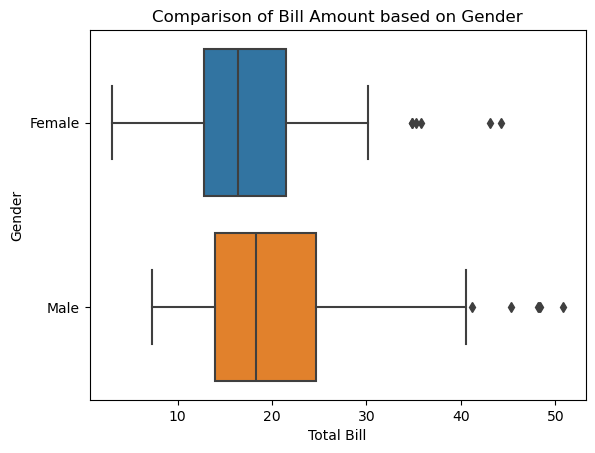

In [19]:
#13.Plot a horizontal boxplot to compare the bill amount based on gender:
# Plot a horizontal boxplot for bill amount based on gender
sns.boxplot(x='total_bill', y='sex', data=tips_df, orient='h')
plt.title('Comparison of Bill Amount based on Gender')
plt.xlabel('Total Bill')
plt.ylabel('Gender')
plt.show()


In [20]:
#14. Find the maximum bill amount for lunch
#and dinner on Saturday and Sunday
# Filter the dataset for lunch and dinner on Saturday and Sunday
weekend_lunch_dinner = tips_df[(tips_df['day'].isin(['Sat', 'Sun'])) & (tips_df['time'].isin(['Lunch', 'Dinner']))]

# Find the maximum bill amount for lunch and dinner on Saturday and Sunday
max_bill_weekend = weekend_lunch_dinner.groupby(['day', 'time'])['total_bill'].max()
print("Maximum bill amount for lunch and dinner on Saturday and Sunday:")
print(max_bill_weekend)


Maximum bill amount for lunch and dinner on Saturday and Sunday:
day  time  
Sat  Dinner    50.81
Sun  Dinner    48.17
Name: total_bill, dtype: float64


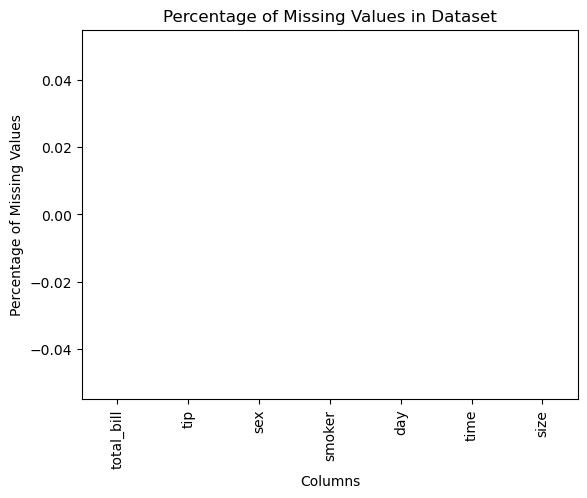

In [21]:
#15. Compute the percentage of missing values in the dataset:
# Compute the percentage of missing values in each column
missing_percentage = (tips_df.isnull().sum() / len(tips_df)) * 100

# Plot the percentage of missing values
missing_percentage.plot(kind='bar')
plt.title('Percentage of Missing Values in Dataset')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.show()


In [22]:
#16.Check if there are any duplicate records in the dataset. 
#If yes, compute the count of the duplicate records and drop them:
# Check for duplicate records
duplicate_count = tips_df.duplicated().sum()
print("Number of duplicate records:", duplicate_count)

# Drop duplicate records
tips_df.drop_duplicates(inplace=True)


Number of duplicate records: 1


NameError: name 'np' is not defined

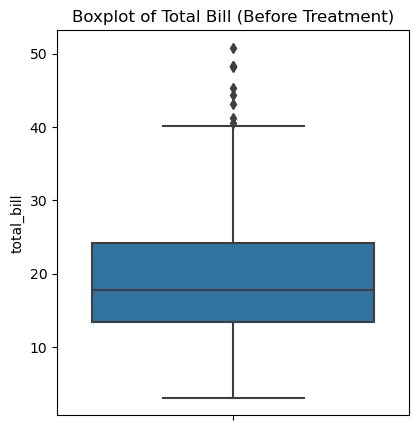

In [23]:
#17.Check if there are any outliers present in the column 
#'total_bill'. If yes, treat them with a transformation approach 
#and plot a boxplot 
# Plot a boxplot for 'total_bill' before treatment
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y='total_bill', data=tips_df)
plt.title('Boxplot of Total Bill (Before Treatment)')

# Apply transformation approach (e.g., log transformation)
tips_df['total_bill_log'] = np.log(tips_df['total_bill'])

# Plot a boxplot for 'total_bill' after treatment
plt.subplot(1, 2, 2)
sns.boxplot(y='total_bill_log', data=tips_df)
plt.title('Boxplot of Total Bill (After Log Transformation)')
plt.tight_layout()
plt.show()

#before and after the treatment:

In [24]:
#18.Check if there are any outliers present in the column 'tip'. 
#If yes,remove them using the IQR technique
# Calculate the IQR
Q1 = tips_df['tip'].quantile(0.25)
Q3 = tips_df['tip'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
outliers = tips_df[(tips_df['tip'] < lower_bound) | (tips_df['tip'] > upper_bound)]
tips_df = tips_df[~((tips_df['tip'] < lower_bound) | (tips_df['tip'] > upper_bound))]


In [25]:
#19. Encode the categorical columns in the dataset and print 5 random 
#samples from the dataframe:
# Encode categorical columns using one-hot encoding
tips_encoded = pd.get_dummies(tips_df)

# Print 5 random samples from the encoded dataframe
print("Random 5 samples from the encoded dataframe:")
print(tips_encoded.sample(5))


Random 5 samples from the encoded dataframe:
     total_bill   tip  size  sex_Female  sex_Male  smoker_No  smoker_Yes  \
108       18.24  3.76     2       False      True       True       False   
184       40.55  3.00     2       False      True      False        True   
197       43.11  5.00     4        True     False      False        True   
63        18.29  3.76     4       False      True      False        True   
65        20.08  3.15     3       False      True       True       False   

     day_Fri  day_Sat  day_Sun  day_Thur  time_Dinner  time_Lunch  
108    False     True    False     False         True       False  
184    False    False     True     False         True       False  
197    False    False    False      True        False        True  
63     False     True    False     False         True       False  
65     False     True    False     False         True       False  


In [30]:
#20. Check the range of the column 'total_bill' and transform the values
#such that the range will be 1:
# Calculate the range of 'total_bill'
total_bill_range = tips_df['total_bill'].max() - tips_df['total_bill'].min()

# Transform the values to have a range of 1
tips_df['total_bill_normalized'] = (tips_df['total_bill'] - tips_df['total_bill'].min()) / total_bill_range

# Print the transformed column
print(tips_df['total_bill_normalized'])


0      0.291579
1      0.152283
2      0.375786
3      0.431713
4      0.450775
         ...   
239    0.543779
240    0.505027
241    0.410557
242    0.308965
243    0.329074
Name: total_bill_normalized, Length: 244, dtype: float64


In [31]:
#21.Load the dataset again by giving the name of the
#dataframe as "tips_df":
# Load the dataset
tips_df = pd.read_csv("tips.csv")

# Print the first few rows of the dataframe
print(tips_df.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [32]:
#22.Split the dataset into two parts (i.e., 70% train and 30% test) 
#and standardize the columns "total_bill" and "size" 
#using the min-max scaling approach:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Select features and target variable
X = tips_df[['total_bill', 'size']]
y = tips_df['tip']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the columns using Min-Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the first few rows of the scaled features
print("First few rows of scaled training features:")
print(X_train_scaled[:5])
print("\nFirst few rows of scaled test features:")
print(X_test_scaled[:5])



First few rows of scaled training features:
[[0.21704394 0.2       ]
 [0.32623169 0.6       ]
 [0.64136707 0.6       ]
 [0.43364403 0.6       ]
 [0.71593431 0.6       ]]

First few rows of scaled test features:
[[0.31225033 0.2       ]
 [0.06702175 0.2       ]
 [0.41722148 0.6       ]
 [0.44695961 0.6       ]
 [0.16089658 0.2       ]]


In [29]:
#23.Train a linear regression model using the training data and print the R-squared value of the prediction
#on the test data:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate the R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared value of the prediction on the test data:", r_squared)


R-squared value of the prediction on the test data: 0.3605903119796181
